In [115]:
import pandas as pd

In [116]:
df=pd.read_csv("salary_prediction_data.csv")

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Education   1000 non-null   object 
 1   Experience  1000 non-null   int64  
 2   Location    1000 non-null   object 
 3   Job_Title   1000 non-null   object 
 4   Age         1000 non-null   int64  
 5   Gender      1000 non-null   object 
 6   Salary      1000 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB


In [118]:
df2=pd.DataFrame()
df2["Experience"]=df.Experience
df2["Age"]=df.Age
df2["Salary"]=df.Salary

In [119]:
df2.head()

,Experience,Age,Salary
0,8,63,84620.053665
1,11,59,142591.255894
2,28,61,97800.255404
3,29,45,96834.671282
4,25,26,132157.786175


In [ ]:
df2.describe().T

In [121]:
df2.isnull().values.any()

False

In [122]:
df2.corr() 

,Experience,Age,Salary
Experience,1.000000,0.044296,0.341918
Age,0.044296,1.000000,-0.053174
Salary,0.341918,-0.053174,1.000000


In [ ]:
import seaborn as sm
import matplotlib.pyplot as plt
sns.pairplot(df2,kind="reg");

In [124]:
import statsmodels.api as sm

In [125]:
X=df2["Experience"]

In [126]:
y=df2["Salary"]

In [127]:
X=sm.add_constant(X)

In [128]:
lm=sm.OLS(y,X)

In [129]:
model=lm.fit()

In [ ]:
model.summary()
"""Düzeltilmiş R^2:Bağımlı değişkenimizdeki değişikliğin %11.6'sini açıkladığını görüyoruz.

   F-statistic:Bağımsız değişkenlerden en az birinin bağımlı değişken üzerinde anlamlı bir etkiye sahip olup olmadığını belirler.
   Prob (F-statistic):F-statistic değerinin anlamlılığını belirler.Genellikle 0.05 veya 0.01 den daha küçükse anlamlı olduğu kabul edilir.
   %0.0000000000000000000000000000836'lık olasılıkla sıfır hipotezi doğrudur.Bu durumda F-statistic anlamlıdır ve sıfır hipotezi reddedilir.
   Yani modelde en az 1 değişken bağımlı değişkeni açıklamada anlamlı bir etkiye sahiptir.
   
   Sabitin coef(katsayi) değeri :88,450 yani eğrinin y eksenini kestiği noktadır.Ortalama ücrettir.
   Experience coef(katsayi) değeri:Bağımsız değişkendeki 1 birimlik artış bağımlı değişkendeki 1158.3068 birimlik artışa denktir.

   P>|t|:Experience için 0.0 olan p değeri,Experience değişkeninin bağımlı değişken üzerindeki hiçbir etkisinin olmaması ihtimali %0.0 dır.
   Ve sonuçlarımız %0.0 ihtimalle şans eseri üretilecektir.

   [0.025   0.975] :Experience için (960.558 1356.056) Bu değerler dışında kalan değerler genellikle aykırı değerler kabul edilebilir.
"""

In [131]:
#Denklemi oluşturalım

In [149]:
print("Salary = " +  str("%.2f" % model.params.const) + " + Exp " + "*" + str(" %.2f" % model.params.Experience))

Salary = 88449.05 + Exp * 1158.31


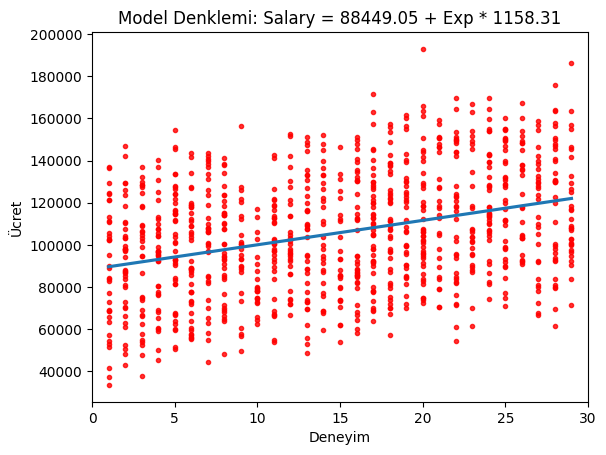

In [169]:
#eğer grafiksel olarak ifade etmek istersek....
g = sns.regplot(x=df2["Experience"], y=df2["Salary"], ci=None, scatter_kws={'color':'r', 's':9})
g.set_title("Model Denklemi: Salary = 88449.05 + Exp * 1158.31")
g.set_ylabel("Ücret")
g.set_xlabel("Deneyim")
plt.xlim(0,30);

Model denklemi:

Salary = 88449.05 + Exp * 1158.31

Örneğin 15 yıl deneyimi olan birisinin maaşı tahmini ne kadar olur?

In [170]:
88449.05 + 15 * 1158.31

105823.7

In [171]:
from sklearn.linear_model import LinearRegression

In [ ]:
X=df2[["Experience"]] #bağımsız değişken

In [ ]:
y=df2[["Salary"]] #bağımlı değişken

In [181]:
reg=LinearRegression() #nesne oluşturduk

In [182]:
model=reg.fit(X,y) 

In [188]:
model.score(X,y) #r^2 değeridir

0.11690788221093384

In [ ]:
model.predict(X)[0:10] #tahmin değerleri

In [ ]:
y[0:10] #tahmin değerlerinin gerçek değerlerle karşılaştırılması

In [189]:
#15 yıl deneyimi olan birisinin maaşı ne olur ?

In [ ]:
maas = model.predict([[15]])[0][0]

In [230]:
print("15 yıl deneyimi olan birisinin maaşı : "+str("%.2f" % maas))

15 yıl deneyimi olan birisinin maaşı : 105823.66


In [ ]:
maas2 = model.predict([[16]])[0][0] - model.predict([[15]])[0][0]

In [232]:
#experience değişkenindeki 1 birimlik artış salarydeki 1158.31 birimlik artışa denk olur.
print("15 yıl deneyimi olan birisi 1 yıl daha çalışırsa maaş artışı ne kadar olur : "+str("%.2f" % maas2))

15 yıl deneyimi olan birisi 1 yıl daha çalışırsa maaş artışı ne kadar olur : 1158.31
